### SALARY PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("global_ai_ml_data_salaries.csv")
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Research Engineer,284900,USD,284900,US,0,US,M
1,2024,SE,FT,Research Engineer,161700,USD,161700,US,0,US,M
2,2024,MI,FT,Research Engineer,138000,USD,138000,US,0,US,M
3,2024,MI,FT,Research Engineer,86000,USD,86000,US,0,US,M
4,2024,SE,FT,Research Engineer,179000,USD,179000,US,0,US,M


In [3]:
def variable_summary(df):
    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes,
        'Unique Values': df.nunique(),
        'Is Categorical': df.dtypes == 'object'
    })
    
    # For columns with data type 'category', also mark them as categorical
    summary['Is Categorical'] = summary['Is Categorical'] | (df.apply(lambda col: col.dtype.name) == 'category')
    
    return summary
summary_df = variable_summary(df)
summary_df

,Column,Data Type,Unique Values,Is Categorical
work_year,work_year,int64,5,False
experience_level,experience_level,object,4,True
employment_type,employment_type,object,4,True
job_title,job_title,object,153,True
salary,salary,int64,3023,False
salary_currency,salary_currency,object,24,True
salary_in_usd,salary_in_usd,int64,3424,False
employee_residence,employee_residence,object,88,True
remote_ratio,remote_ratio,int64,3,False
company_location,company_location,object,78,True


In [4]:
# unique_values = {col: df[col].unique() for col in df.columns}
# unique_values

In [5]:
duplicate_values = df.duplicated().sum()
duplicate_values

8668

In [6]:
df = df.drop_duplicates()

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.shape

(11897, 11)

In [9]:
# Correlation of salary and salary_in_usd
correlation_matrix = df[['salary', 'salary_in_usd']].corr()
print("Correlation between salary and salary_in_usd:")
print(correlation_matrix)

Correlation between salary and salary_in_usd:
                 salary  salary_in_usd
salary         1.000000       0.111914
salary_in_usd  0.111914       1.000000


In [10]:
df.drop(columns=["salary_in_usd",'employee_residence'],axis=1,inplace=True)

In [11]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,remote_ratio,company_location,company_size
10466,2023,SE,FT,Machine Learning Engineer,142200,USD,0,US,M
5691,2024,SE,FT,Data Engineer,244000,USD,0,US,M
17246,2023,MI,FT,Data Scientist,180000,USD,100,US,M
637,2024,SE,FT,Data Engineer,720000,USD,0,US,M
418,2024,SE,FT,Principal Statistical Programmer,106200,USD,0,US,M


### EDA 

In [12]:
###  descreate Categorical columns :  experiance_level , employmnt_type . remote_ratio , company_size
### descreate numerical columns : work_year
### taget column : salary
### remaining columns : company_location , employee_residence

***categorical vs numerical columns***

In [13]:
df.describe()

,work_year,salary,remote_ratio
count,11897.000000,1.189700e+04,11897.000000
mean,2023.353450,1.678019e+05,33.634530
std,0.773573,4.001452e+05,46.686296
min,2020.000000,1.400000e+04,0.000000
25%,2023.000000,9.600000e+04,0.000000
50%,2024.000000,1.400000e+05,0.000000
75%,2024.000000,1.900000e+05,100.000000
max,2024.000000,3.040000e+07,100.000000


(work_year
 2024    5966
 2023    4534
 2022    1108
 2021     214
 2020      75
 Name: count, dtype: int64,
 <Axes: title={'center': 'work_year: The year the salary was paid.'}, xlabel='work_year', ylabel="count of number of people's salary ">)

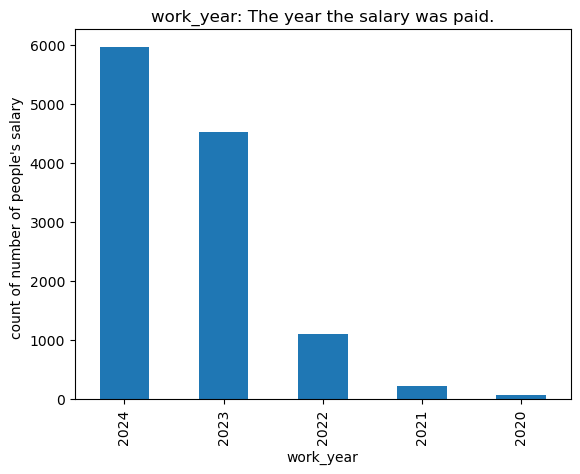

In [14]:
plt.title("work_year: The year the salary was paid.")
plt.ylabel("count of number of people's salary ")
df['work_year'].value_counts() , df['work_year'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'exp vs sal')

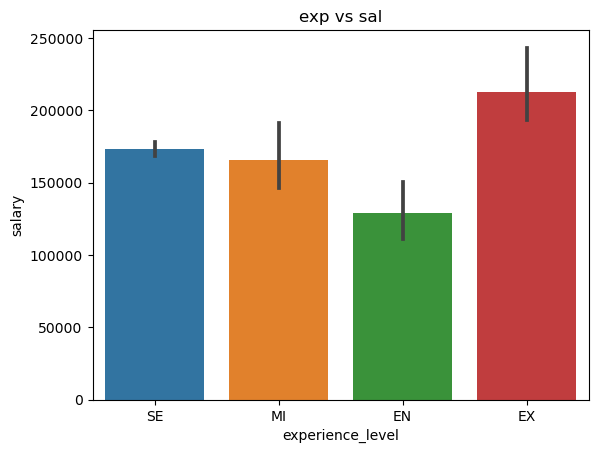

In [15]:
sns.barplot(x="experience_level",y="salary", data=df)
plt.title("exp vs sal")

experience_level: The experience level in the job during the year (EN: Entry-level/Junior, MI: Mid-level/Intermediate, SE: Senior-level/Expert, EX: Executive-level/Director).
#### For the SE i.e senior level/ expert the mean salary is a around 180000
#### For the MI i.e mid level/ intermediate the mean salary is a around 160000
#### For the EN i.e entry level/ junior the mean salary is a around 150000
#### For the SE i.e Executive level/ Director the mean salary is a around 240000

In [16]:
pd.crosstab(df['employment_type'],df['experience_level'],normalize="columns")*100

experience_level,EN,EX,MI,SE
employment_type,,,,
CT,0.561347,0.229358,0.504901,0.146049
FL,0.240577,0.000000,0.178200,0.073025
FT,96.952686,99.770642,99.108999,99.707901
PT,2.245389,0.000000,0.207900,0.073025


employment_type: The type of employment for the role (PT: Part-time, FT: Full-time, CT: Contract, FL: Freelance).

In [17]:
pd.crosstab(df['employment_type'],df['company_size'],normalize="columns")*100

company_size,L,M,S
employment_type,,,
CT,1.035503,0.172336,4.591837
FL,0.147929,0.054422,3.571429
FT,97.337278,99.555556,88.775510
PT,1.479290,0.217687,3.061224


company_size: The average number of people that worked for the company during the year (S: less than 50 employees, M: 50 to 250 employees, L: more than 250 employees).

In [18]:
### feature engineering

In [19]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,remote_ratio,company_location,company_size
0,2024,SE,FT,Research Engineer,284900,USD,0,US,M
1,2024,SE,FT,Research Engineer,161700,USD,0,US,M
2,2024,MI,FT,Research Engineer,138000,USD,0,US,M
3,2024,MI,FT,Research Engineer,86000,USD,0,US,M
4,2024,SE,FT,Research Engineer,179000,USD,0,US,M


# Dataset Columns Description

- **work_year**: The year the salary was paid.
- **experience_level**: The experience level in the job during the year:
  - EN: Entry-level/Junior
  - MI: Mid-level/Intermediate
  - SE: Senior-level/Expert
  - EX: Executive-level/Director
- **employment_type**: The type of employment for the role:
  - PT: Part-time
  - FT: Full-time
  - CT: Contract
  - FL: Freelance
- **job_title**: The role worked in during the year.
- **salary**: The total gross salary amount paid.
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
- **remote_ratio**: The overall amount of work done remotely:
  - 0: No remote work
  - 50: Partially remote/hybrid
  - 100: Fully remote
- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size**: The average number of people that worked for the company during the year:
  - S: less than 50 employees
  - M: 50 to 250 employees
  - L: more than 250 employees


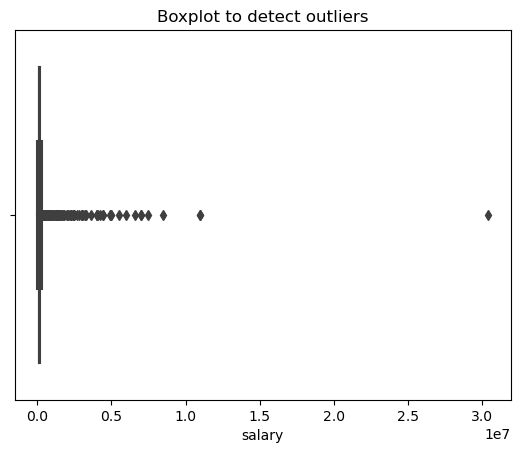

In [20]:

sns.boxplot(x=df['salary'])
plt.title('Boxplot to detect outliers')
plt.show()

In [21]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')


Lower Bound: -45000.0, Upper Bound: 331000.0


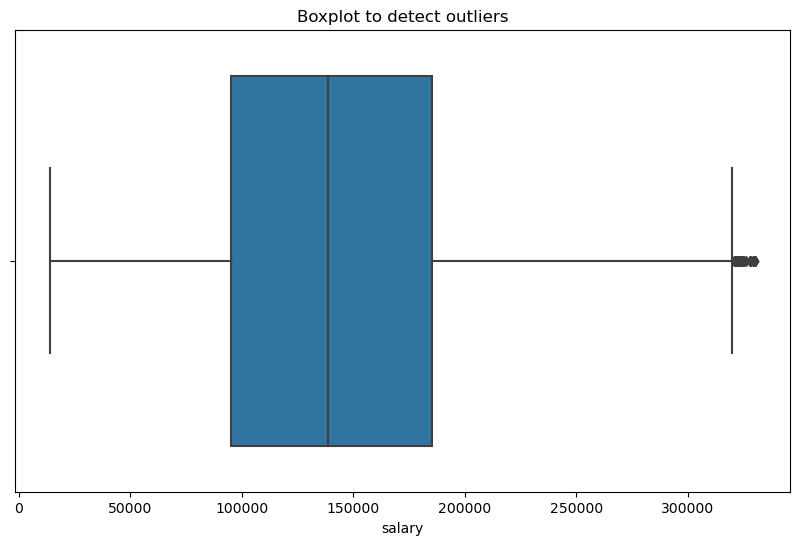

In [22]:
# Remove outliers
df = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary'])
plt.title('Boxplot to detect outliers')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [24]:
x_train,x_test,y_train,y_test =train_test_split(df.drop(columns=['salary']),df['salary'],test_size=0.2,random_state=42)

In [25]:
x_train

,work_year,experience_level,employment_type,job_title,salary_currency,remote_ratio,company_location,company_size
10954,2023,SE,FT,Analytics Engineer,USD,0,US,M
424,2024,SE,FT,Data Engineer,USD,0,US,M
10737,2023,MI,FT,Research Engineer,USD,0,US,M
1464,2024,EN,FT,Data Analyst,USD,0,US,M
14524,2023,SE,FT,Machine Learning Engineer,USD,0,US,M
...,...,...,...,...,...,...,...,...
20104,2022,SE,FT,Data Analyst,USD,100,US,M
8616,2024,SE,FT,Data Scientist,USD,0,US,M
9086,2024,SE,FT,Data Engineer,USD,0,US,M
1032,2024,SE,FT,Research Scientist,USD,0,US,M


- **experience_level**: The experience level in the job during the year:
  - EN: Entry-level/Junior
  - MI: Mid-level/Intermediate
  - SE: Senior-level/Expert
  - EX: Executive-level/Director
- **employment_type**: The type of employment for the role:
  - PT: Part-time
  - FT: Full-time
  - CT: Contract
  - FL: Freelance
 - **company_size**: The average number of people that worked for the company during the year:
      - S: less than 50 employees
      - M: 50 to 250 employees
      - L: more than 250 employees
- **are in ordinal categorical column so use ordinal encoder for this column**
  

In [26]:
el = OrdinalEncoder(categories=[["EN","MI","SE","EX"]])
x_train[["experience_level"]]= el.fit_transform(x_train[["experience_level"]])


In [27]:
x_test[["experience_level"]]= el.fit_transform(x_test[["experience_level"]])

In [28]:
cs = OrdinalEncoder(categories=[["S","M","L"]])
x_train[["company_size"]]= cs.fit_transform(x_train[["company_size"]])
x_test[["company_size"]]= cs.fit_transform(x_test[["company_size"]])

In [29]:
x_train["company_size"].value_counts() , x_train["experience_level"].value_counts() , 

(company_size
 1.0    8692
 2.0     484
 0.0     140
 Name: count, dtype: int64,
 experience_level
 2.0    5361
 1.0    2649
 0.0     973
 3.0     333
 Name: count, dtype: int64)

In [30]:
### ordinal encoder for the campany size : s: 0.0 , M :1.0 and L :2.0
### ordinal encoder  for the  experience_level: EN : 0.0 , MI : 1.0 , SE : 2.0 and EX : 3.0

In [31]:
from sklearn.preprocessing import LabelEncoder

# Fit and transform the job titles
label_encoder = LabelEncoder()
x_train['job_title_encoded'] = label_encoder.fit_transform(x_train['job_title'])
x_test['job_title_encoded'] = label_encoder.fit_transform(x_test['job_title'])

# Create a mapping of job titles to their encoded values
job_title_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mapping
for job_title, encoded_value in job_title_mapping.items():
    print(f'{job_title}: {encoded_value}')


AI Architect: 0
AI Data Scientist: 1
AI Developer: 2
AI Engineer: 3
AI Product Manager: 4
AI Programmer: 5
AI Research Scientist: 6
AI Researcher: 7
AI Scientist: 8
AI Software Engineer: 9
Analytics Engineer: 10
Applied Data Scientist: 11
Applied Machine Learning Scientist: 12
Applied Research Scientist: 13
Applied Scientist: 14
BI Analyst: 15
BI Data Analyst: 16
BI Developer: 17
Big Data Engineer: 18
Business Data Analyst: 19
Business Intelligence: 20
Business Intelligence Analyst: 21
Business Intelligence Consultant: 22
Business Intelligence Data Analyst: 23
Business Intelligence Developer: 24
Business Intelligence Engineer: 25
Business Intelligence Lead: 26
Business Intelligence Manager: 27
Cloud Data Engineer: 28
Cloud Database Engineer: 29
Computational Biologist: 30
Computer Vision Engineer: 31
Computer Vision Software Engineer: 32
Data Analyst: 33
Data Analyst Lead: 34
Data Analytics Consultant: 35
Data Analytics Lead: 36
Data Analytics Manager: 37
Data Analytics Specialist: 38


In [32]:
job_title_mapping_df = pd.DataFrame(list(job_title_mapping.items()), columns=['Job Title', 'Encoded Value'])
job_title_mapping_df


,Job Title,Encoded Value
0,AI Architect,0
1,AI Data Scientist,1
2,AI Developer,2
3,AI Engineer,3
4,AI Product Manager,4
...,...,...
100,Research Engineer,100
101,Research Scientist,101
102,Robotics Engineer,102
103,Software Data Engineer,103


In [33]:
x_train.drop(columns='job_title',axis =1 , inplace=True)


In [34]:
x_test.drop(columns='job_title',axis=1,inplace=True)

In [35]:
x_train

,work_year,experience_level,employment_type,salary_currency,remote_ratio,company_location,company_size,job_title_encoded
10954,2023,2.0,FT,USD,0,US,1.0,12
424,2024,2.0,FT,USD,0,US,1.0,58
10737,2023,1.0,FT,USD,0,US,1.0,137
1464,2024,0.0,FT,USD,0,US,1.0,47
14524,2023,2.0,FT,USD,0,US,1.0,111
...,...,...,...,...,...,...,...,...
20104,2022,2.0,FT,USD,100,US,1.0,47
8616,2024,2.0,FT,USD,0,US,1.0,84
9086,2024,2.0,FT,USD,0,US,1.0,58
1032,2024,2.0,FT,USD,0,US,1.0,138


In [36]:
# onehot_encoder = OneHotEncoder(sparse=False,)

# # Fit the encoder on X_train and transform X_train
# x_train_encoded = onehot_encoder.fit_transform(x_train[['employment_type', 'salary_currency']])
# x_test_encoded = onehot_encoder.transform(x_test[['employment_type', 'salary_currency']])

# # Get the new column names
# encoded_column_names = onehot_encoder.get_feature_names_out(['employment_type', 'salary_currency'])

# # Create DataFrames with the encoded columns
# x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=encoded_column_names, index=x_train.index)
# x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=encoded_column_names, index=x_test.index)

# # Concatenate the original X_train and X_test (excluding the original categorical columns) with the encoded DataFrames
# x_train = pd.concat([x_train.drop(['employment_type', 'salary_currency'], axis=1), x_train_encoded_df], axis=1)
# x_test = pd.concat([x_test.drop(['employment_type', 'salary_currency'], axis=1), x_test_encoded_df], axis=1)

# # Display the first few rows of the transformed X_train and X_test
# print(x_train.head())
# print(x_test.head())

# # Generate mappings for 'employment_type' and 'salary_currency'
# employment_type_mapping = {category: i for i, category in enumerate(onehot_encoder.categories_[0])}
# salary_currency_mapping = {category: i for i, category in enumerate(onehot_encoder.categories_[1])}

# # Display the mappings
# print("Employment Type Mapping:")
# for employment_type, encoded_value in employment_type_mapping.items():
#     print(f'{employment_type}: {encoded_value}')

# print("\nSalary Currency Mapping:")
# for salary_currency, encoded_value in salary_currency_mapping.items():
#     print(f'{salary_currency}: {encoded_value}')

In [37]:
label_encoder_employment_type = LabelEncoder()
label_encoder_salary_currency = LabelEncoder()

# Fit and transform the 'employment_type' column in x_train, and transform in x_test
x_train['employment_type_encoded'] = label_encoder_employment_type.fit_transform(x_train['employment_type'])
x_test['employment_type_encoded'] = label_encoder_employment_type.transform(x_test['employment_type'])

# Fit and transform the 'salary_currency' column in x_train, and transform in x_test
x_train['salary_currency_encoded'] = label_encoder_salary_currency.fit_transform(x_train['salary_currency'])
x_test['salary_currency_encoded'] = label_encoder_salary_currency.transform(x_test['salary_currency'])

# Drop the original 'employment_type' and 'salary_currency' columns
x_train = x_train.drop(['employment_type', 'salary_currency'], axis=1)
x_test = x_test.drop(['employment_type', 'salary_currency'], axis=1)

# Display the first few rows of the transformed x_train and x_test
print(x_train.head())
print(x_test.head())

# Generate mappings for 'employment_type' and 'salary_currency'
employment_type_mapping = {label: index for index, label in enumerate(label_encoder_employment_type.classes_)}
salary_currency_mapping = {label: index for index, label in enumerate(label_encoder_salary_currency.classes_)}

# Display the mappings
print("Employment Type Mapping:")
for employment_type, encoded_value in employment_type_mapping.items():
    print(f'{employment_type}: {encoded_value}')

print("\nSalary Currency Mapping:")
for salary_currency, encoded_value in salary_currency_mapping.items():
    print(f'{salary_currency}: {encoded_value}')

       work_year  experience_level  remote_ratio company_location  \
10954       2023               2.0             0               US   
424         2024               2.0             0               US   
10737       2023               1.0             0               US   
1464        2024               0.0             0               US   
14524       2023               2.0             0               US   

       company_size  job_title_encoded  employment_type_encoded  \
10954           1.0                 12                        2   
424             1.0                 58                        2   
10737           1.0                137                        2   
1464            1.0                 47                        2   
14524           1.0                111                        2   

       salary_currency_encoded  
10954                       11  
424                         11  
10737                       11  
1464                        11  
14524            

In [38]:
x_train = x_train.drop(['company_location'], axis=1)
x_test = x_test.drop(['company_location'], axis=1)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the accuracy metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3074968933.394685
Mean Absolute Error (MAE): 43467.26181694804
R-squared (R2): 0.24993503823723617


In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming y_true and y_pred are your true and predicted values respectively
y_pred = model.predict(x_test)  # Predicted values from your regression model

# Calculate regression metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


R-squared: 0.25
Mean Absolute Error: 43467.26
Mean Squared Error: 3074968933.39
Root Mean Squared Error: 55452.40


In [54]:
y_pred

array([143443.73649389,  79890.16918429, 163877.45853984, ...,
       133538.74780618, 133538.74780618, 127565.57881333])

In [41]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model_rf.fit(x_train, y_train)

# Predict on the test data
y_pred_rf = model_rf.predict(x_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Random Forest Regressor Metrics:')
print(f'R-squared: {r2_rf:.2f}')
print(f'Mean Absolute Error: {mae_rf:.2f}')
print(f'Mean Squared Error: {mse_rf:.2f}')
print(f'Root Mean Squared Error: {rmse_rf:.2f}')

Random Forest Regressor Metrics:
R-squared: 0.08
Mean Absolute Error: 46621.35
Mean Squared Error: 3753878204.55
Root Mean Squared Error: 61268.90


In [44]:

import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from xgboost import XGBRegressor
param_grid_xgb = {
    'n_estimators': [50, 100, 150],  # Number of boosting rounds
    'max_depth': [3, 5, 7],          # Maximum depth of each tree
    'learning_rate': [0.1, 0.01],    # Step size shrinkage used in update to prevent overfitting
    'gamma': [0, 0.1, 0.2],          # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': [0.8, 1.0],         # Fraction of samples used to fit each tree
    'colsample_bytree': [0.8, 1.0]   # Fraction of features used to fit each tree
}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

xgb = XGBRegressor(random_state=42)

grid_search_xgb = GridSearchCV(estimator=xgb,
                               param_grid=param_grid_xgb,
                               scoring=make_scorer(mean_squared_error, greater_is_better=False),
                               cv=kfold,
                               verbose=1,
                               n_jobs=-1)
grid_result_xgb = grid_search_xgb.fit(x_train, y_train)

# Print best parameters and best score
print("Best Parameters for XGBoost:", grid_result_xgb.best_params_)
print("Best Score (MSE) for XGBoost:", grid_result_xgb.best_score_)

# Predict on test set with best model
best_xgb = grid_result_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f'Mean Squared Error (XGBoost): {mse_xgb:.2f}')
print(f'Root Mean Squared Error (XGBoost): {rmse_xgb:.2f}')



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Score (MSE) for XGBoost: -2604069876.5774975
Mean Squared Error (XGBoost): 3045603462.52
Root Mean Squared Error (XGBoost): 55186.99


In [49]:
# Optional: Feature importance analysis
feature_importances = best_xgb.feature_importances_
feature_names = x_train.columns
sorted_idx = np.argsort(feature_importances)[::-1]

print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i + 1}. Feature '{feature_names[idx]}' ({feature_importances[idx]:.4f})")

Feature ranking:
1. Feature 'salary_currency_encoded' (0.3859)
2. Feature 'experience_level' (0.3854)
3. Feature 'job_title_encoded' (0.1209)
4. Feature 'company_size' (0.0313)
5. Feature 'work_year' (0.0294)
6. Feature 'employment_type_encoded' (0.0255)
7. Feature 'remote_ratio' (0.0215)


ModuleNotFoundError: No module named 'lightgbm'